# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [3]:
df = pd.read_csv('Mod07_Tarefa_01_df_dummies.csv')
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,True,False,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,True,False,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False


In [4]:
y = df.mau
x = df.drop('mau', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

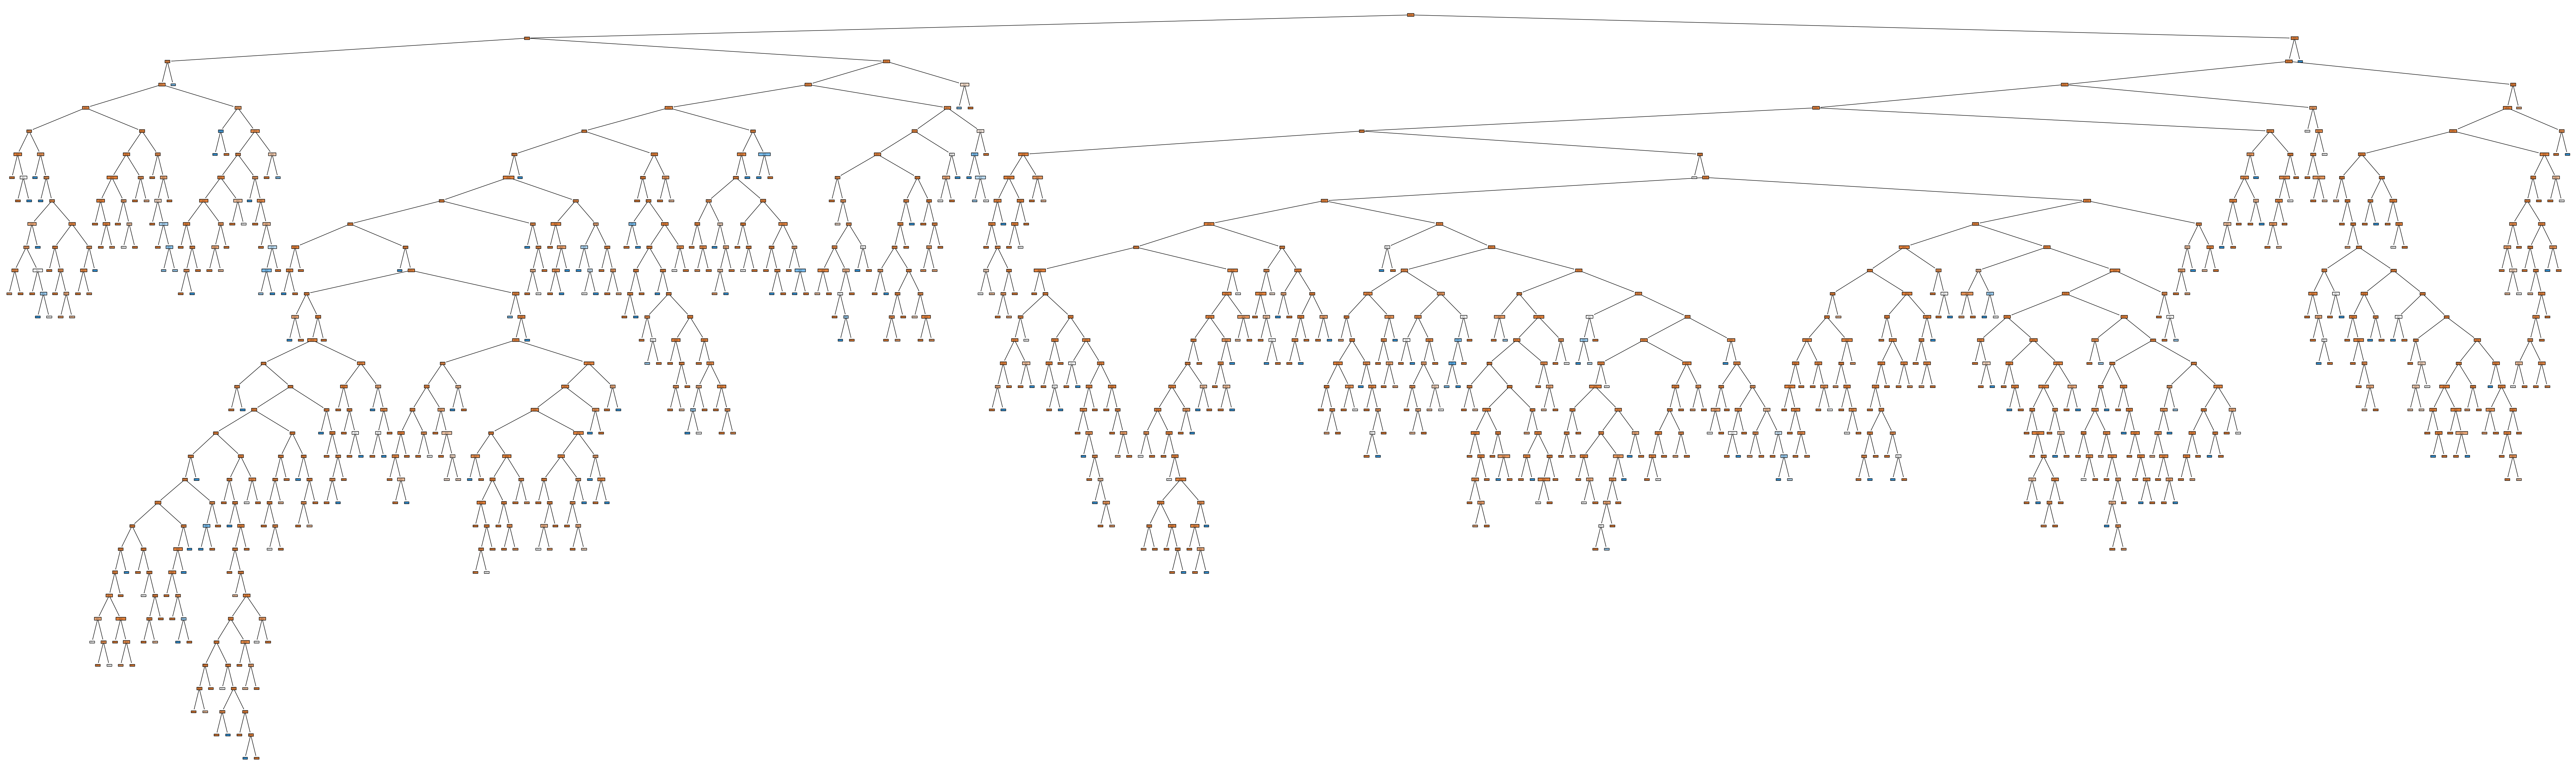

In [10]:
# Defina um objeto com a função da árvore de decisão vista em aula.
clf = DecisionTreeClassifier(random_state=100)

# Treine o modelo com os dados que você separou para treinamento.
clf = clf.fit(x,y)

# Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize=(100, 30))
plot_tree(clf,
          filled=True,
          class_names=['Reprovados', 'Aprovados'],
          feature_names=list(x.columns));

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [12]:
# 1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
y_pred_test = clf.predict(x_test)
y_pred_test

array([False, False, False, ..., False, False, False])

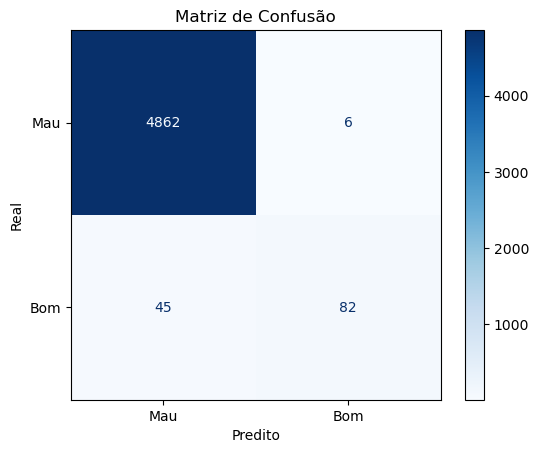

In [19]:
# 2. Produza a visualização da matriz de confusão para a base de teste.

# Calcula a matriz de confusão
cm_test = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)

# Exibe a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Mau", "Bom"])
disp.plot(cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [20]:
# 3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia na base de teste: {accuracy_test:.2f}")
y_pred_train = clf.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Acurácia na base de treinamento: {accuracy_train:.2f}")

Acurácia na base de teste: 0.99
Acurácia na base de treinamento: 0.99


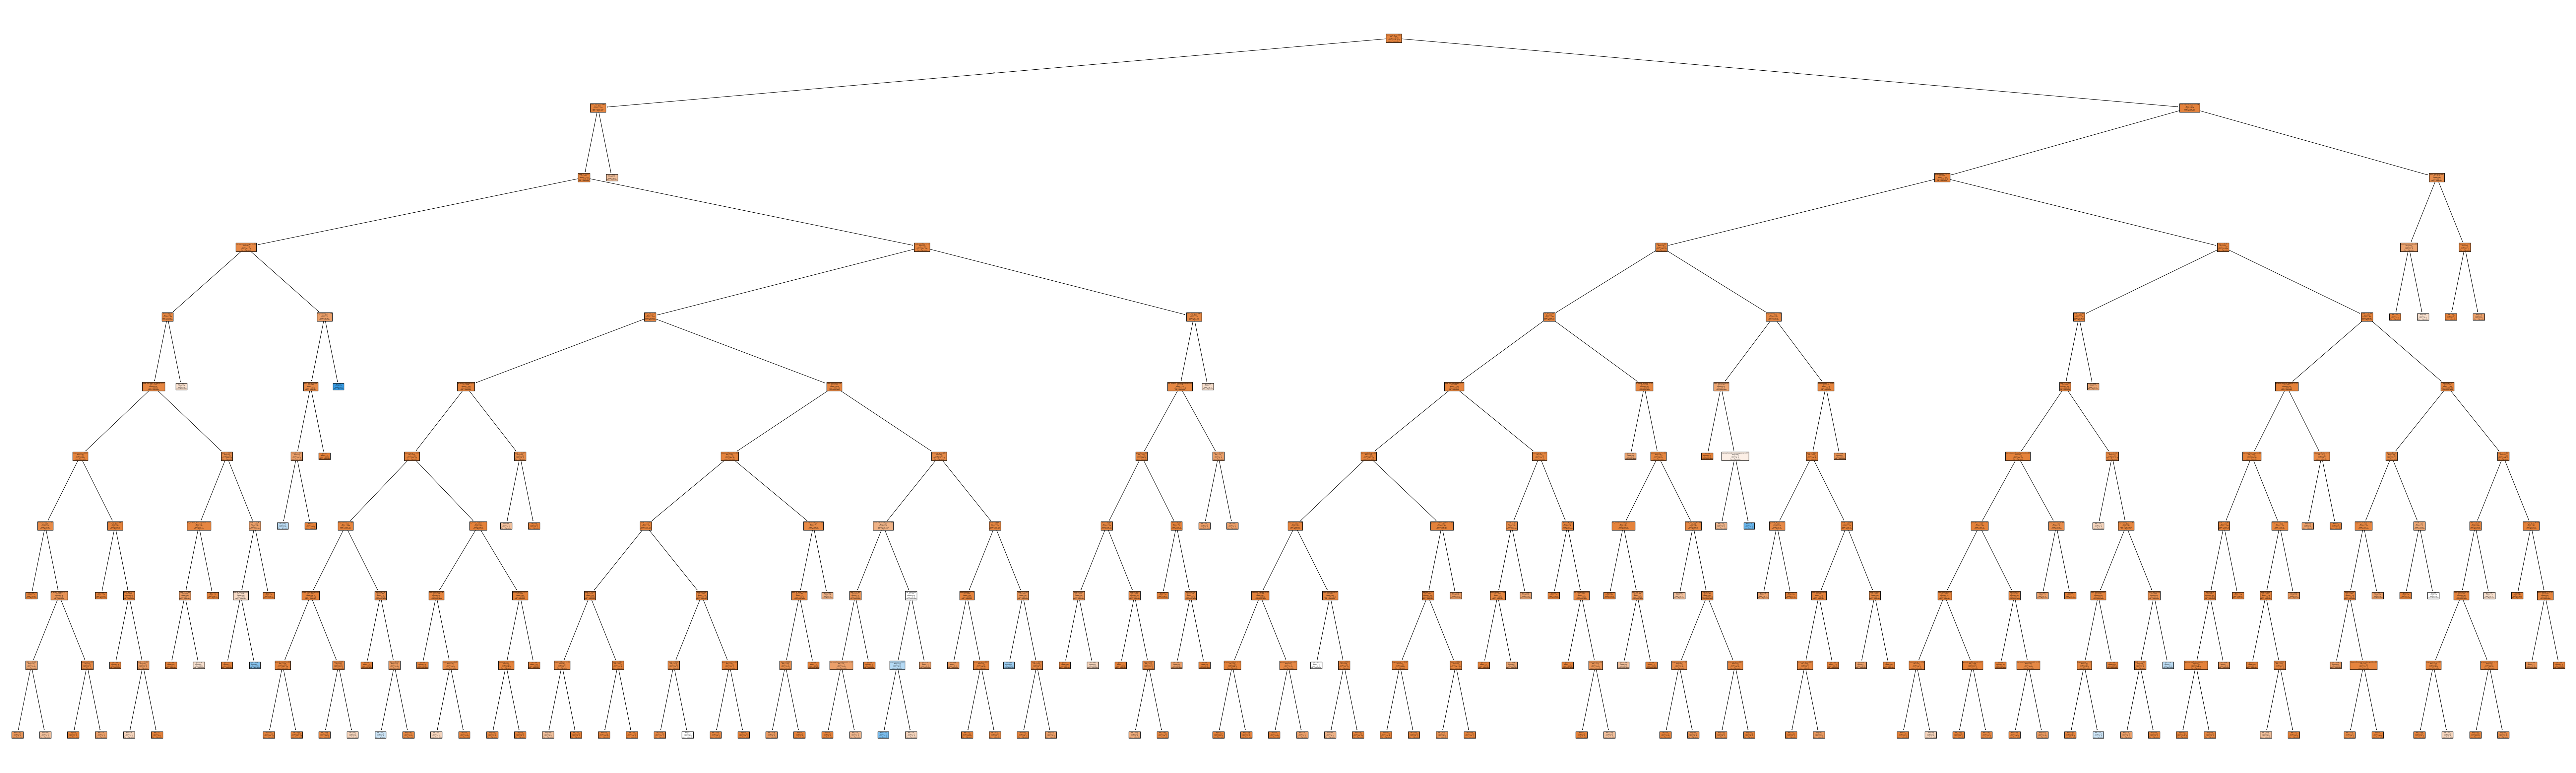

In [35]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
# Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção 
# de proponentes foram classificados como 'maus'?

clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_new = clf_new.fit(x_train, y_train)

# visualizando a árvore (fiquei curioso rs)
plt.figure(figsize=(100, 30))
plot_tree(clf_new,
          filled=True,
          class_names=['Reprovados', 'Aprovados'],
          feature_names=list(x.columns));

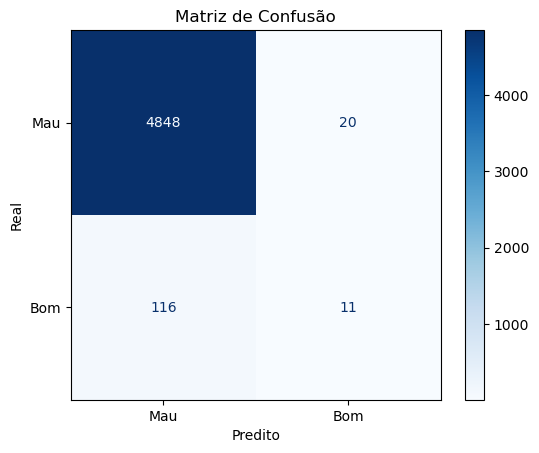

In [38]:
# gerando e visualizando a matriz de confusão 
y_pred_test_new = clf_new.predict(x_test)
cm_test_new = confusion_matrix(y_test, y_pred_test_new, labels=clf_new.classes_)
disp_new = ConfusionMatrixDisplay(confusion_matrix=cm_test_new, display_labels=["Mau", "Bom"])
disp_new.plot(cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [40]:
# proporção de maus pagadores

proporcao_maus = (y_pred_test_new == True).mean()
print(f"Proporção de proponentes classificados como maus pagadores: {proporcao_maus:.2f}")

Proporção de proponentes classificados como maus pagadores: 0.01


In [41]:
y_pred_todos_bons = [False] * len(y_test)
accuracy_todos_bons = accuracy_score(y_test, y_pred_todos_bons)
print(f"Acurácia classificando todos como bons pagadores: {accuracy_todos_bons:.2f}")

Acurácia classificando todos como bons pagadores: 0.97
